# Análise do COVID-19 em SP (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("https://raw.githubusercontent.com/elhenrico/covid19-Brazil-timeseries/master/confirmed-cases.csv").fillna(0)
df.rename({"Unnamed: 0": "Estado", "Unnamed: 1": "Sigla"}, axis='columns', inplace=True)
df.head(10)

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,16/3,17/3,18/3,19/3,20/3,21/3,22/3,23/3,24/3,25/3
0,Brasil,BR,1,1,1,2,2,2,2,3,...,234,291,428,621,904,1128,1546,1891,2201,2433
1,Rondônia,RO,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,3,3,3,5
2,Acre,AC,0,0,0,0,0,0,0,0,...,0,0,0,3,7,9,11,11,17,23
3,Amazonas,AM,0,0,0,0,0,0,0,0,...,1,1,1,3,3,11,26,32,47,54
4,Roraima,RR,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,8
5,Pará,PA,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,4,5,5,7
6,Amapá,AP,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
7,Tocantins,TO,0,0,0,0,0,0,0,0,...,0,0,0,1,1,2,2,5,7,7
8,Norte,(N),0,0,0,0,0,0,0,0,...,1,1,1,8,15,26,49,59,82,105
9,Maranhão,MA,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,8,8


## 2. Total de casos diários no Brasil (ordenação decrescente)

In [2]:
df = df[df.Estado != 'Sudeste']
df = df[df.Estado != 'Nordeste']
df = df[df.Estado != 'Centro-Oeste']
df = df[df.Estado != 'Sul']
df = df[df.Estado != 'Norte']
df = df[df.Estado != 'Brasil']

confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf["Casos Confirmados"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = confirmedCasesDf.sort_values(by=['Casos Confirmados'], ascending = False)
sortedConfirmedCasesGroupedDf.head(10)

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,17/3,18/3,19/3,20/3,21/3,22/3,23/3,24/3,25/3,Casos Confirmados
22,São Paulo,SP,1,1,1,2,2,2,2,3,...,164,240,286,396,459,631,745,810,862,862
21,Rio de Janeiro,RJ,0,0,0,0,0,0,0,0,...,33,45,65,109,119,186,233,305,370,370
11,Ceará,CE,0,0,0,0,0,0,0,0,...,5,9,20,55,68,112,163,182,200,200
31,Distrito Federal,DF,0,0,0,0,0,0,0,0,...,22,26,42,87,100,117,133,160,160,160
19,Minas Gerais,MG,0,0,0,0,0,0,0,0,...,7,15,29,35,38,83,128,130,133,133
26,Rio Grande do Sul,RS,0,0,0,0,0,0,0,0,...,10,19,28,37,60,72,86,98,123,123
25,Santa Catarina,SC,0,0,0,0,0,0,0,0,...,7,10,20,21,51,57,68,107,109,109
17,Bahia,BA,0,0,0,0,0,0,0,0,...,3,3,30,33,41,49,63,76,84,84
24,Paraná,PR,0,0,0,0,0,0,0,0,...,6,13,23,32,43,50,56,65,81,81
3,Amazonas,AM,0,0,0,0,0,0,0,0,...,1,1,3,3,11,26,32,47,54,54


### 2.1 Total de casos diários somente em SP

In [3]:
confirmedCasesByDaySPDf = confirmedCasesDf[confirmedCasesDf.Estado == 'São Paulo']
confirmedCasesByDaySPDf

,Estado,Sigla,26/2,27/2,28/2,29/2,1/3,2/3,3/3,4/3,...,17/3,18/3,19/3,20/3,21/3,22/3,23/3,24/3,25/3,Casos Confirmados
22,São Paulo,SP,1,1,1,2,2,2,2,3,...,164,240,286,396,459,631,745,810,862,862


In [4]:
confirmedCasesByDaySPCleanDf = confirmedCasesByDaySPDf.drop(["Estado", "Sigla", "Casos Confirmados"], axis=1)
datesSP = list(confirmedCasesByDaySPCleanDf)

i = 0
for d in datesSP:
    if i < 9:
        datesSP[i] = '03/0' + str(i + 1) + '/2020'
    else:
        datesSP[i] = '03/' + str(i + 1) + '/2020'
    i = i + 1

infectedSP = confirmedCasesByDaySPCleanDf.iloc[0]

dfForPlotSP = pd.DataFrame(
    {'datas': datesSP, 'infectados': infectedSP})
dfForPlotSP['datas'] = pd.to_datetime(dfForPlotSP['datas'])
dfForPlotSP

,datas,infectados
26/2,2020-03-01,1
27/2,2020-03-02,1
28/2,2020-03-03,1
29/2,2020-03-04,2
1/3,2020-03-05,2
2/3,2020-03-06,2
3/3,2020-03-07,2
4/3,2020-03-08,3
5/3,2020-03-09,6
6/3,2020-03-10,10


(0.0, 1.0)

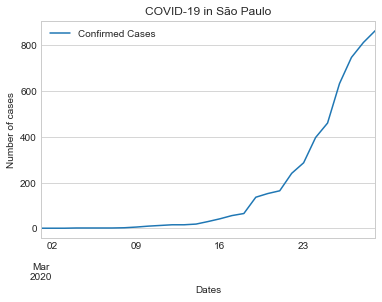

In [5]:
fig = plt.figure()
ax = plt.axes()

left, right = plt.xlim()
plt.xlim(0, 0.01)

dfForPlotSP.set_index('datas')['infectados'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in São Paulo")
plt.xlabel("Dates")
plt.ylabel("Number of cases")
plt.legend()
left, right

## 3. Previsão por meio da Regressão

### 3.1 Dados comuns a todos os algoritmos abaixo

In [6]:
def plotGraph(XTrained, yTrained, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'datas': X, 'infectados': y.astype(int)})
    df['datas'] = pd.to_datetime(df['datas'])

    fig = plt.figure()
    ax = plt.axes()
    redLine = plt.plot(XReal, yReal, 'r:', label='Confirmed Cases')
    df.set_index('datas')['infectados'].plot(legend=True, grid=True, label='Predicted Cases');
    plt.title("COVID-19 in São Paulo ("+algorithm+")")
    plt.xlabel("Datas")
    plt.ylabel("Número de casos")
    
    blue_patch = mpatches.Patch(color='blue', label='Predicted Cases')
    red_patch = mpatches.Patch(color='red', label='Confirmed Cases')
    plt.legend(handles=[red_patch, blue_patch])

In [7]:
import datetime

diasASimular = 60
dfForPlotDaysWithInfected = dfForPlotSP[dfForPlotSP['infectados'] != 0]

XTrain = np.arange(0, len(dfForPlotDaysWithInfected['datas']))
yTrain = dfForPlotDaysWithInfected['infectados']

XPredict = np.arange(0, len(XTrain) + diasASimular)

XRealCases = dfForPlotDaysWithInfected['datas']
yRealCases = dfForPlotDaysWithInfected['infectados']

predictedDays = pd.date_range(dfForPlotDaysWithInfected['datas'].iloc[-1] + datetime.timedelta(days=1), periods=diasASimular, freq='D')
X = np.append(dfForPlotDaysWithInfected['datas'], predictedDays)

### 3.1 Regressão Linear

In [8]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(XPredict.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   26,   52,   78,  104,  130,  156,  182,  207,  233,  260,
        286,  312,  338,  364,  390,  416,  442,  468,  494,  520,  546,
        572,  598,  624,  650,  676,  702,  728,  754,  780,  806,  832,
        859,  885,  911,  937,  963,  989, 1015, 1041, 1067, 1093, 1119,
       1145, 1171, 1197, 1223, 1249, 1275, 1301, 1327, 1353, 1379, 1405,
       1431, 1457, 1484, 1510, 1536, 1562, 1588, 1614, 1640, 1666, 1692,
       1718, 1744, 1770, 1796, 1822, 1848, 1874, 1900, 1926, 1952, 1978,
       2004, 2030, 2056, 2082, 2109, 2135, 2161, 2187, 2213, 2239, 2265,
       2291])

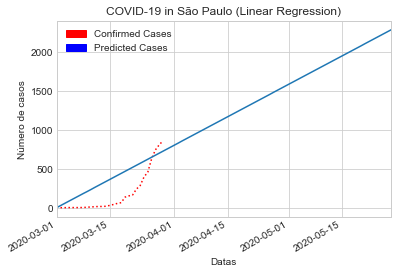

In [9]:
plotGraph(X, y, XRealCases, yRealCases, "Linear Regression")

### 3.2 Polynomial Regression 2D

In [10]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

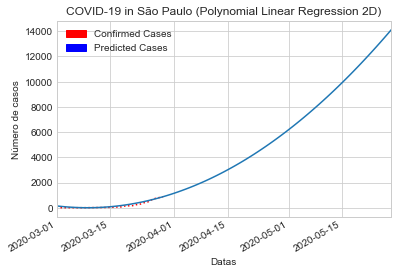

In [11]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 2D")

### 3.3 Polynomial Regression 3D

In [12]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

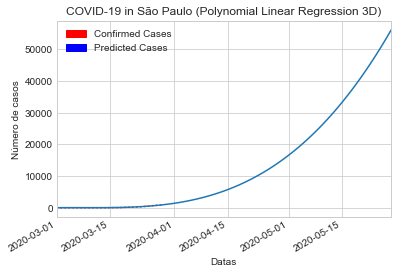

In [13]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 3D")

### 3.4 Polynomial Regression 4D

In [14]:
#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(XPredict.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1

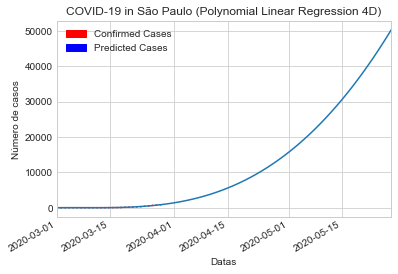

In [15]:
plotGraph(X, y, XRealCases, yRealCases, "Polynomial Linear Regression 4D")